# Machine Learning

## *Workshop 10*  [![Open In Colab](https://github.com/oballinger/QM2/blob/main/colab-badge.png?raw=1)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W10.%20Machine%20Learning.ipynb)


This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#print("TensorFlow version:", tf.__version__)

If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


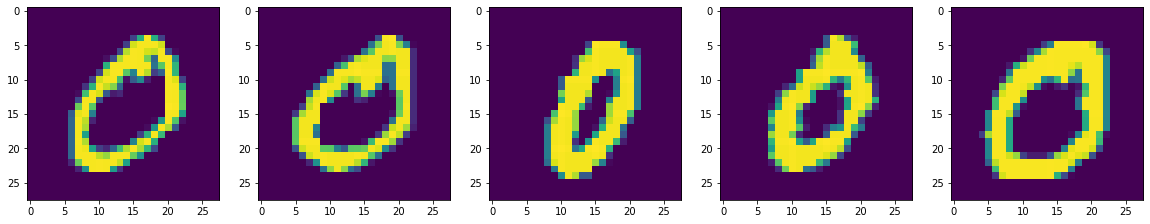

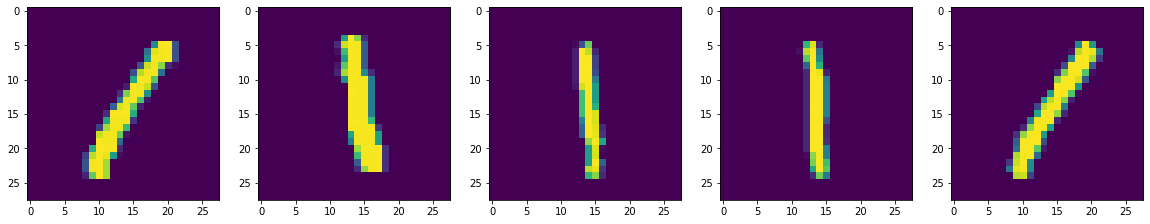

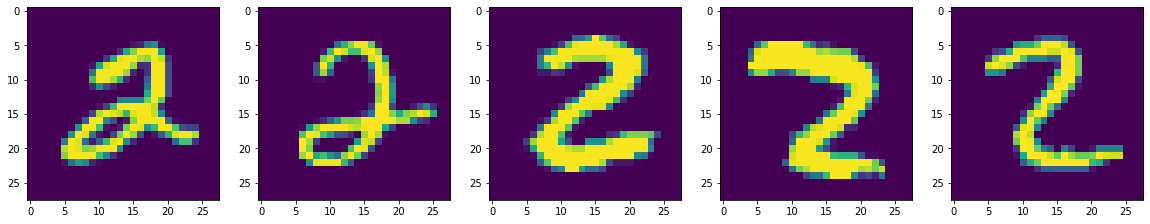

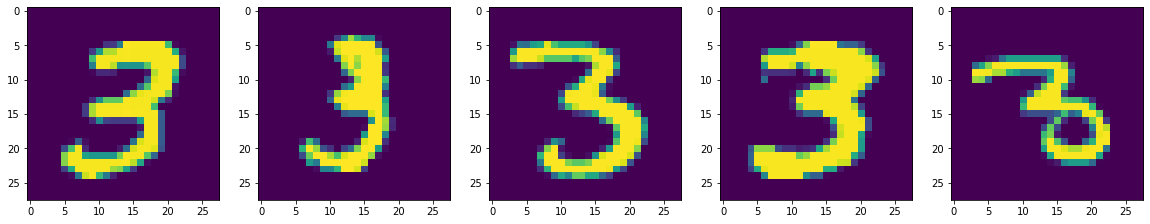

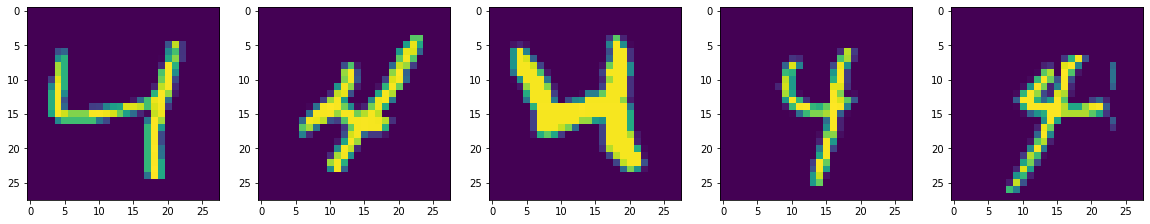

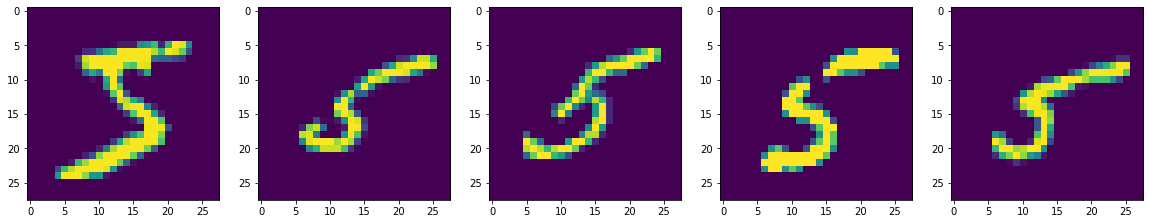

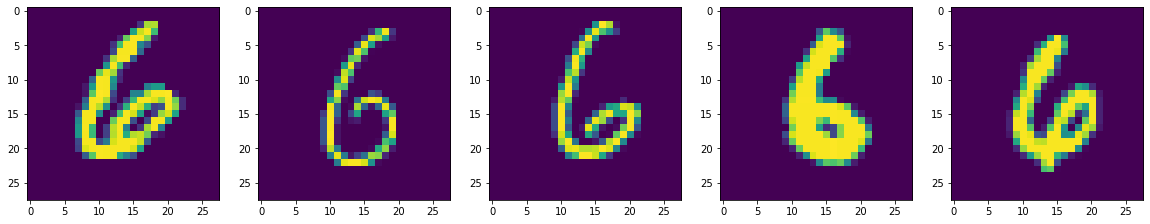

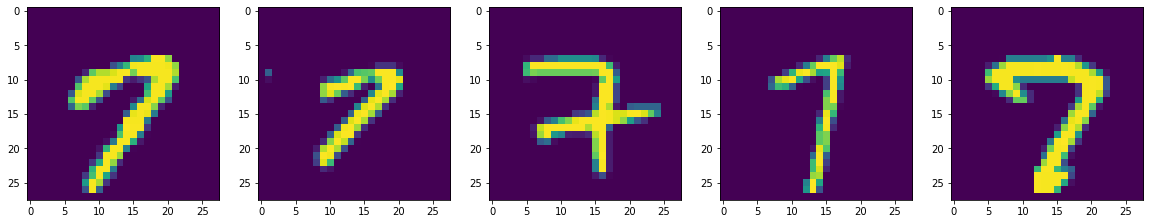

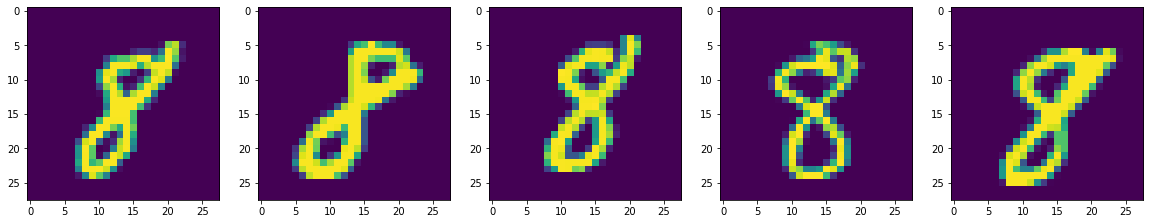

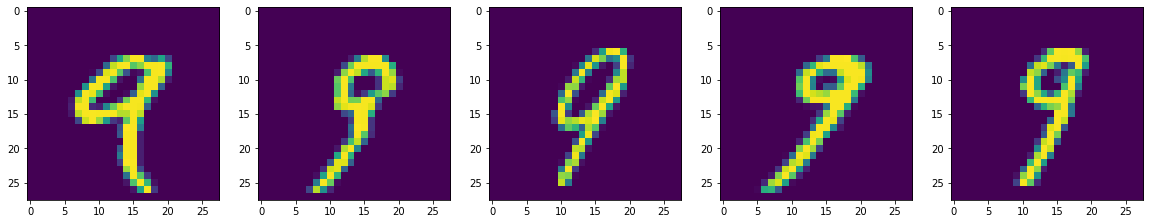

In [ ]:

def plot_num(number):

  item_index = np.where(y_train[:1000]==number)
  subset=x_train[item_index]
  
  egs=5
  fig, axs = plt.subplots(1,egs, figsize=(20,10))

  for i in range(0,egs):
    axs[i].imshow(subset[i])


for x in range(0,10):
  plot_num(x)

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.33447966,  0.35151538, -0.35632688, -0.2735348 ,  0.8568236 ,
        -0.8503612 , -0.34408805, -0.40424255,  0.4791569 , -0.00873779]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.12650587, 0.12867945, 0.06340117, 0.0688737 , 0.21328573,
        0.03868484, 0.06418189, 0.06043489, 0.1461986 , 0.08975388]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

3.2523074

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2955 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1416 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1072 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9808
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9825
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9853
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.043

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0715 - accuracy: 0.9785 - 529ms/epoch - 2ms/step


[0.07152838259935379, 0.9785000085830688]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

9


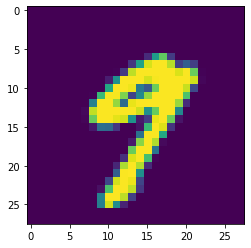

In [ ]:
#probability_model(x_test[:1])
predictions=probability_model.predict(x_test)

index=20

print(np.argmax(predictions[index]))
plt.imshow(x_test[index])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
